***Introduction***

Here we are creating a regressor model to predict the point scored by a NBA player. our dataset has 30 features and 1 target variable.

***The columns are:***

- PLAYER = Player Name (corresponds to name in 2013-2014 season)

- POS = Position of the player

- AGE = Age of the player

- BREF_TEAM_ID  = Team code

- G = Number of games the player has played

- GS = Number of games the player started

- MP = Minutes Played (higher for some teams that have played over time games)

- FG = Field Goals Made (number of baskets made not counting free throws)

- FGA = Field Goals Attempted (number of shots taken not counting free throws)

- FG. = Field Goal Percentage (column FG divided by column FGA)

- X3P = 3 Point Shots Made (shots made from beyond 3 point arc)

- X3PA = 3 Point Shots Attempted (shots taken from beyond 3 point arc)

- X3P. = 3 Point Shot Percentage (column X3P divided by column X3PA)

- X2P = 3 Point Shots Made (shots made from beyond 2 point arc)

- X2PA = 3 Point Shots Attempted (shots taken from beyond 2 point arc)

- X2P. = 3 Point Shot Percentage (column X2P divided by column X2PA)

- FT = Free Throws Made (total free foul shots made)

- FTA = Free Throws Attempted (total free foul shots taken)

- FT. = Free Throw Percentage (column FT divided by column FTA)

- ORB = Offensive Rebounds (missed team shots that were recovered)

- DRB = Defensive Rebounds (missed opponents’ shots that were recovered)

- REB = Rebounds (column ORB added to column DRB)

- AST = Assists (total field goals that were assisted on)

- STL = Steals (total opponents’ possessions taken away)

- BLK = Blocks (total number of opponents’ field goals blocked)

- TOV = Turnovers (total possessions given away)

- PF = Personal Fouls (total fouls commited by team)

- PTS = Pts Scored (total points scored throughout the season)

- SEASON = Year (year that season ends, from 2013 to 2014)

- SEASON_END = End of season 2013

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score
import pickle
%matplotlib inline

In [2]:
#data collection
data = pd.read_csv('nba_2013.csv')
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
#dimension of data
data.shape

(481, 31)

In [4]:
#data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [5]:
#statistics of data
data.describe(include='all')

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
count,481,481,481.000000,481,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481,481.0
unique,481,7,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,Archie Goodwin,SG,NaN,TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-2014,NaN
freq,1,109,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481,NaN
mean,NaN,NaN,26.509356,NaN,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,...,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,NaN,2013.0
std,NaN,NaN,4.198265,NaN,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,...,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,NaN,0.0
min,NaN,NaN,19.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2013.0
25%,NaN,NaN,23.000000,NaN,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,...,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,NaN,2013.0
50%,NaN,NaN,26.000000,NaN,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,...,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,NaN,2013.0
75%,NaN,NaN,29.000000,NaN,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,...,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,NaN,2013.0


## EDA

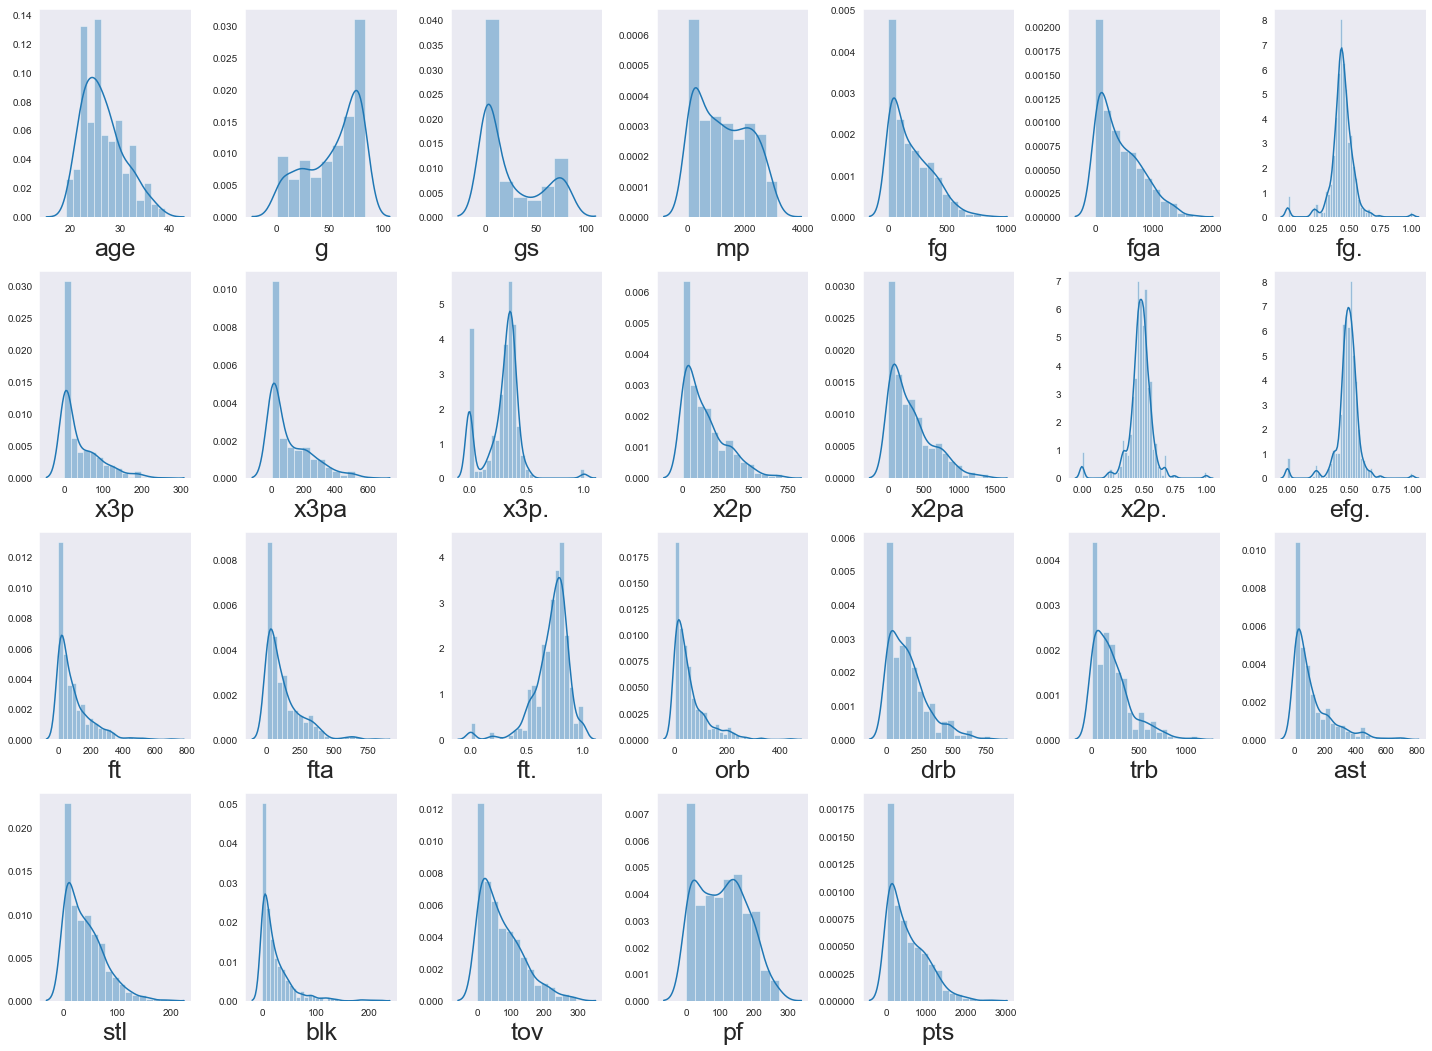

In [6]:
#visualizing data
plt.figure(figsize=(20,25))
pltnumber = 1

for column in data.drop(['season_end'], axis=1).columns:
    if data[column].dtype != object:
        if pltnumber<=45:
            ax=plt.subplot(7,7,pltnumber)
            sns.distplot(data[column], ax=ax)
            plt.xlabel(column, fontsize=25)
        pltnumber+=1
plt.tight_layout()

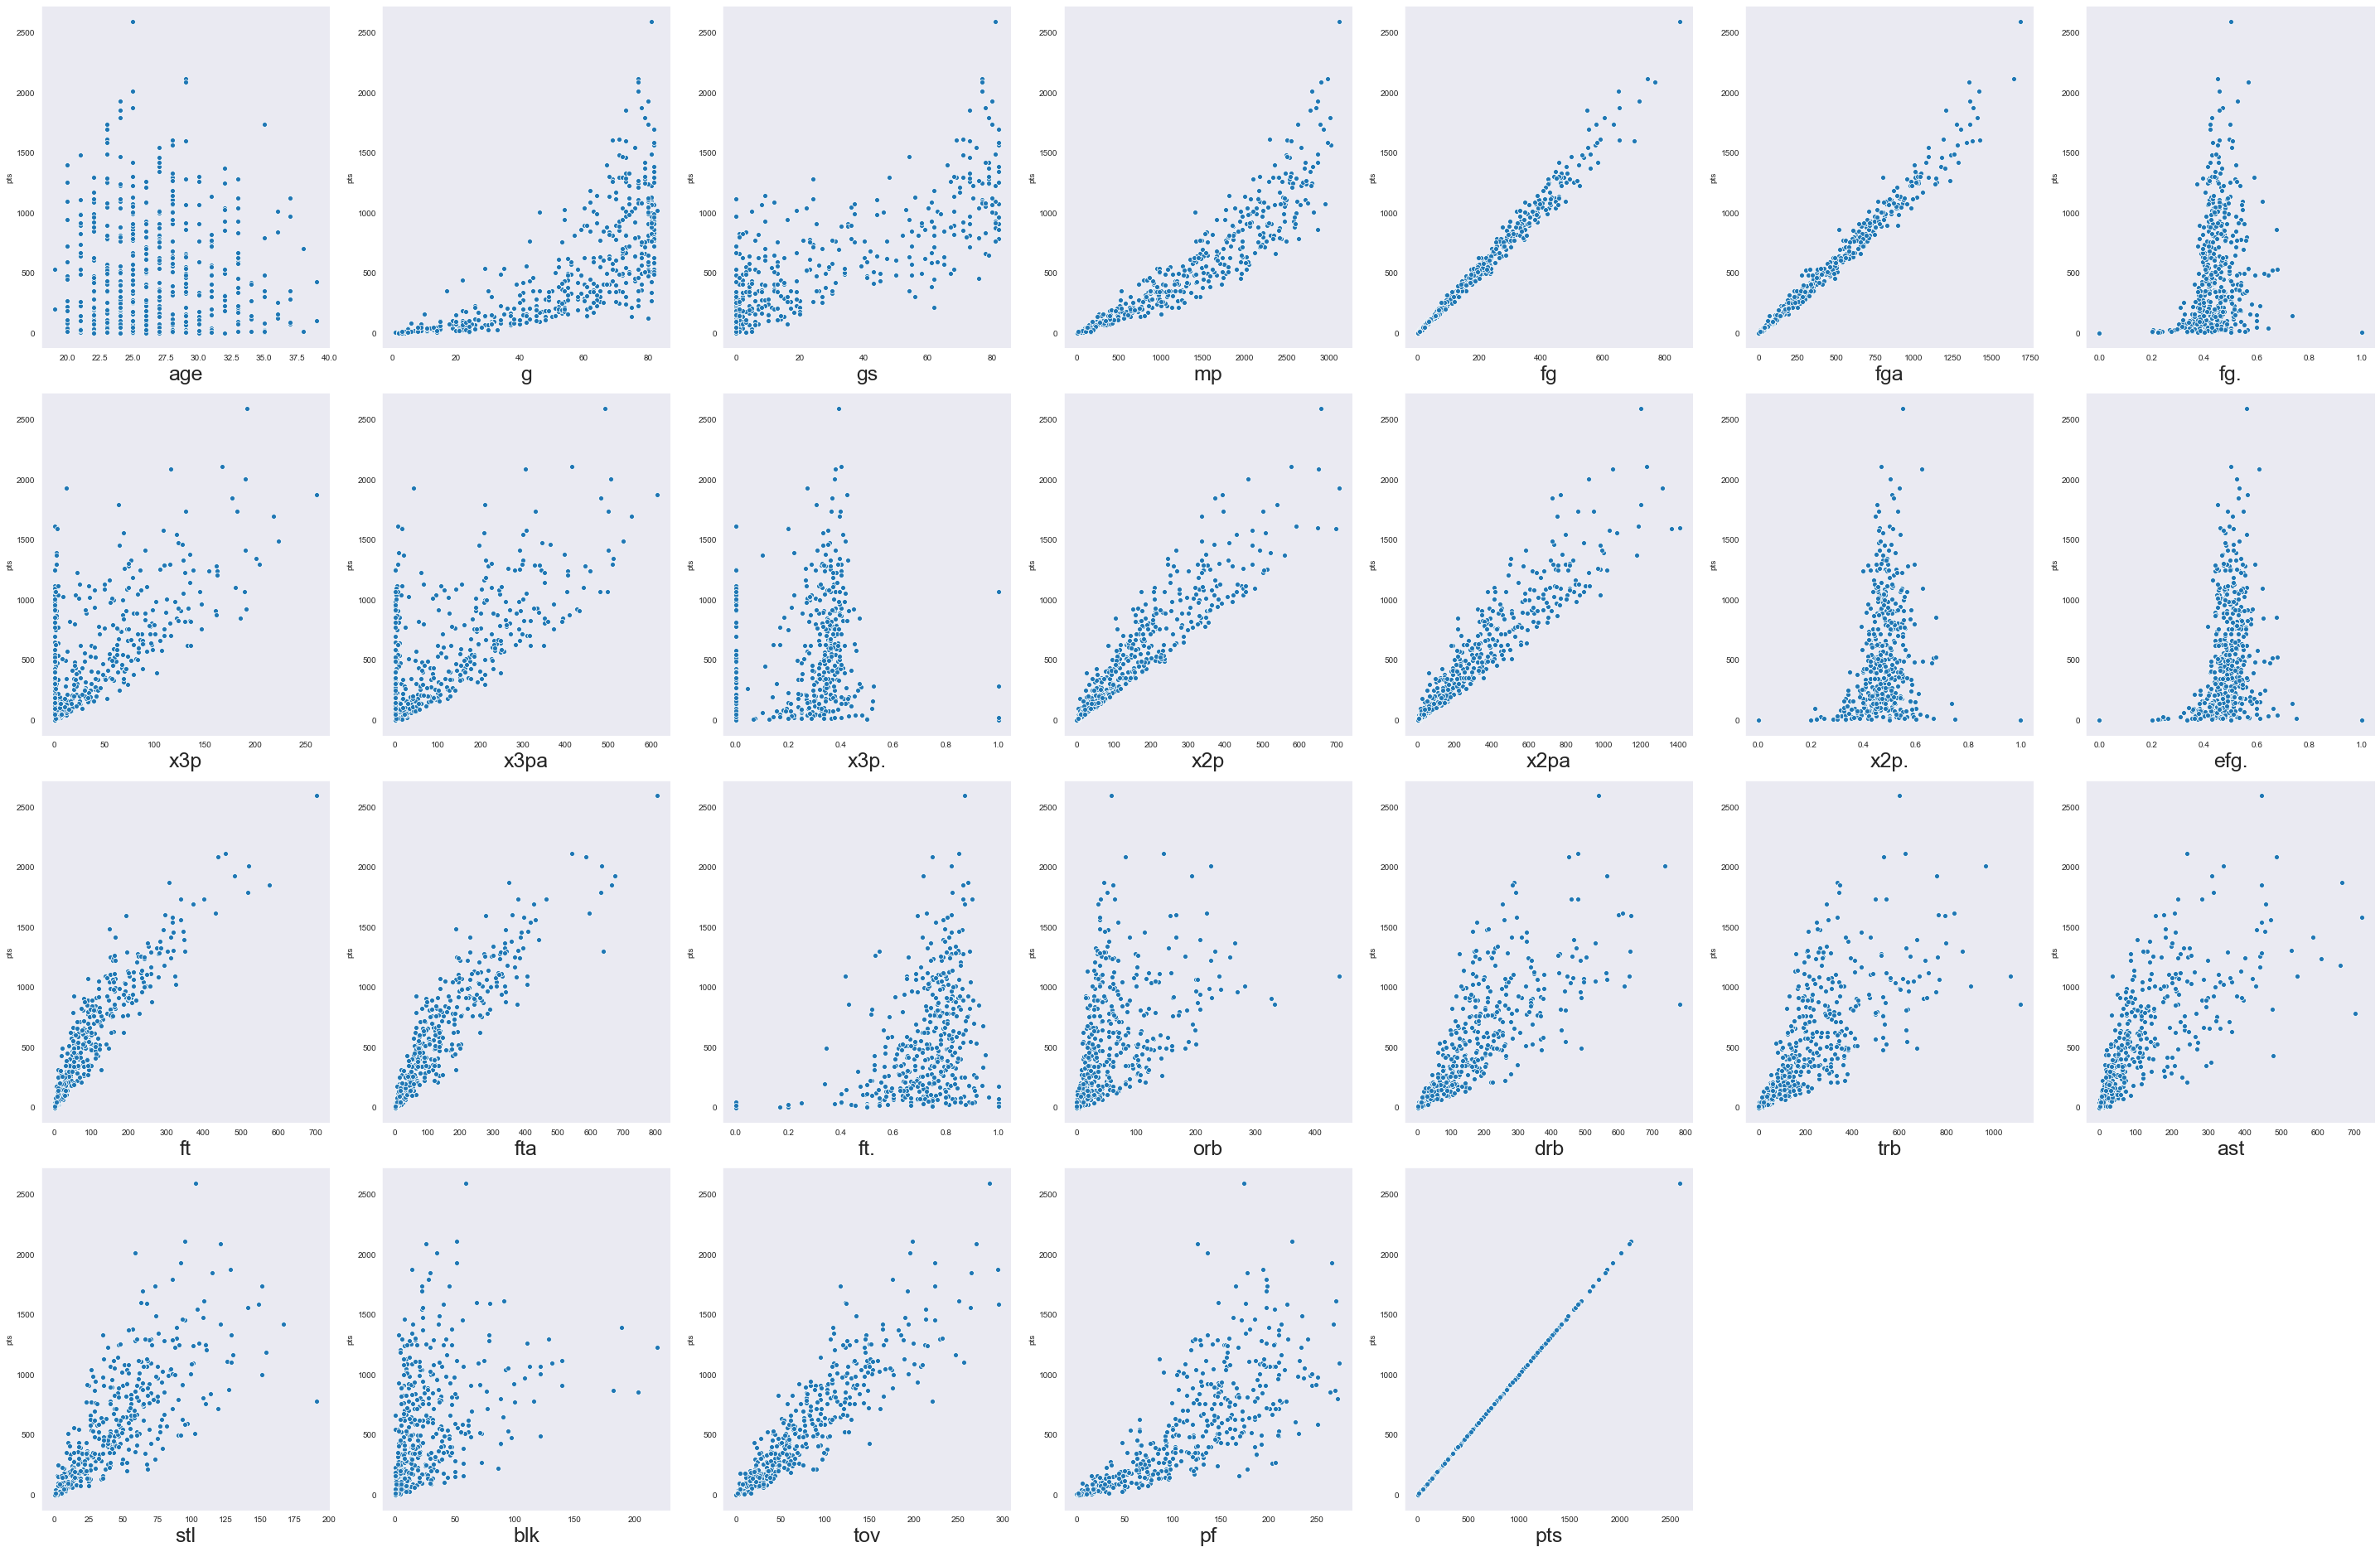

In [7]:
#visualizing data
plt.figure(figsize=(40,45))
pltnumber = 1

for column in data.drop(['season_end'], axis=1).columns:
    if data[column].dtype != object:
        if pltnumber<=45:
            ax=plt.subplot(7,7,pltnumber)
            sns.scatterplot(column,'pts', data=data, ax=ax)
            plt.xlabel(column, fontsize=25)
        pltnumber+=1
plt.tight_layout()

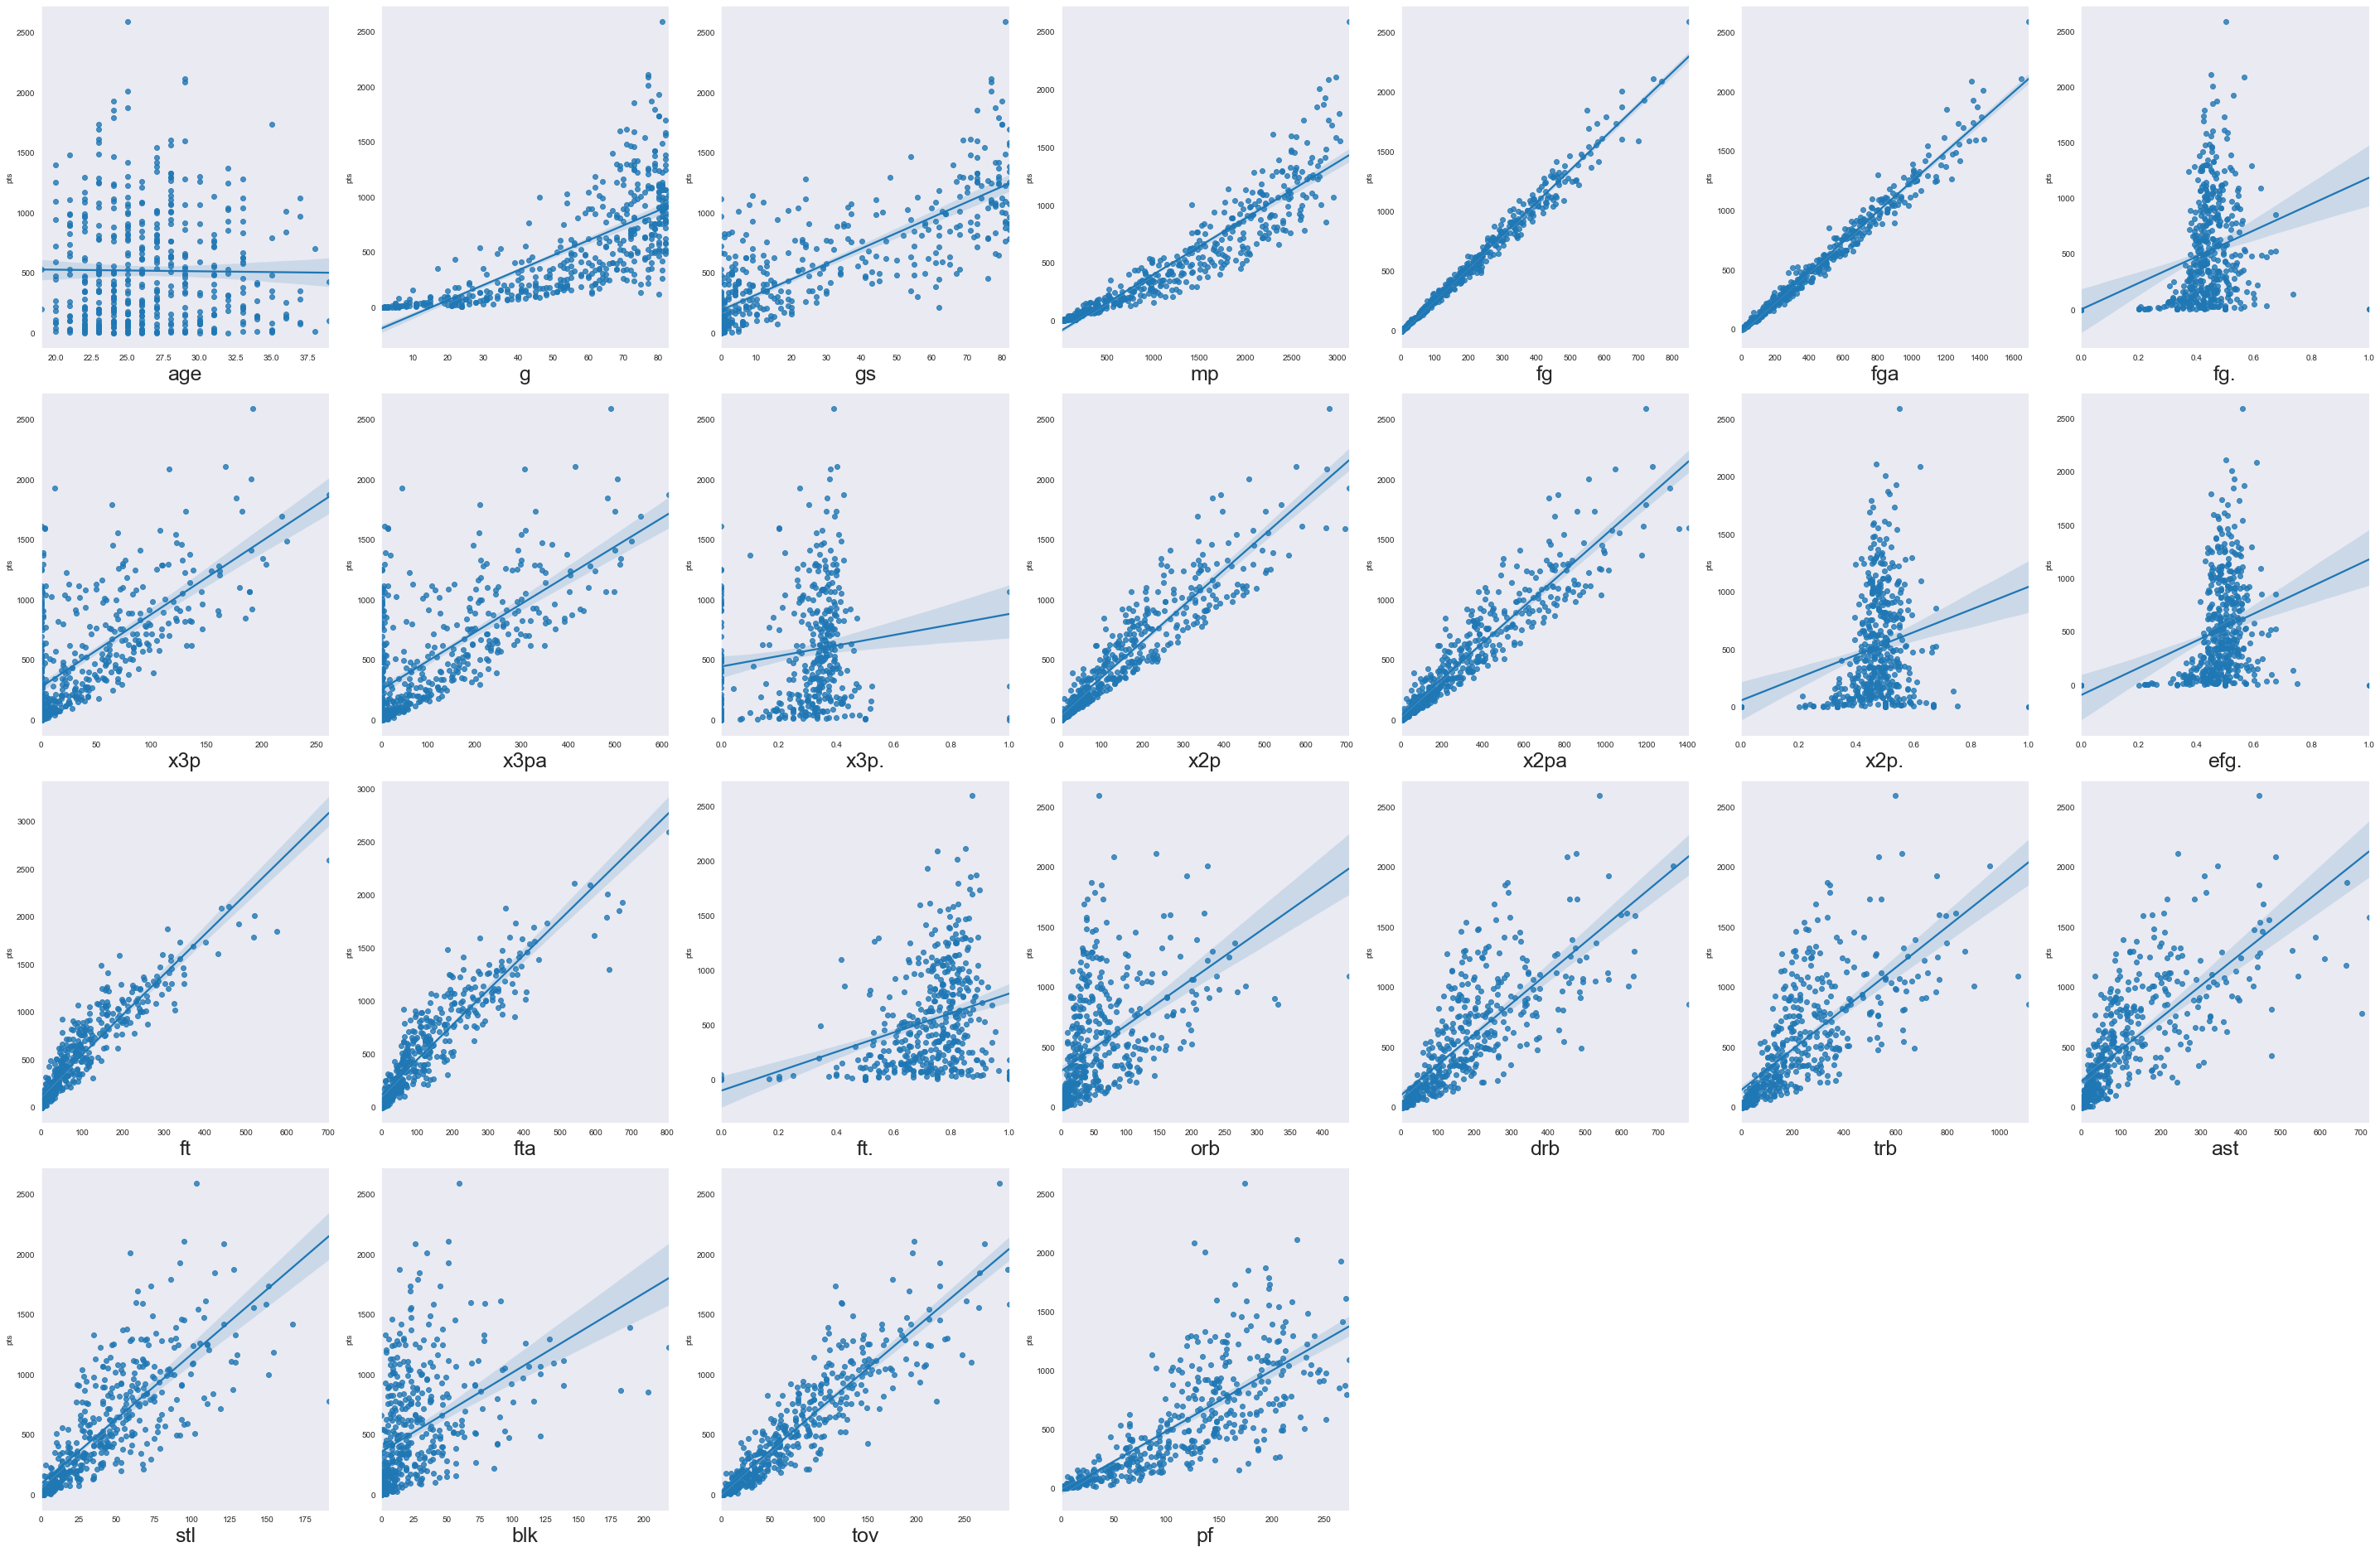

In [8]:
#checking linearity of data
plt.figure(figsize=(40,45))
pltnumber = 1

for column in data.drop(['season_end', 'pts'], axis=1).columns:
    if data[column].dtype != object:
        if pltnumber<=45:
            ax=plt.subplot(7,7,pltnumber)
            sns.regplot(column,'pts', data=data, ax=ax)
            plt.xlabel(column, fontsize=25)
        pltnumber+=1
plt.tight_layout()

## Feature Engineering

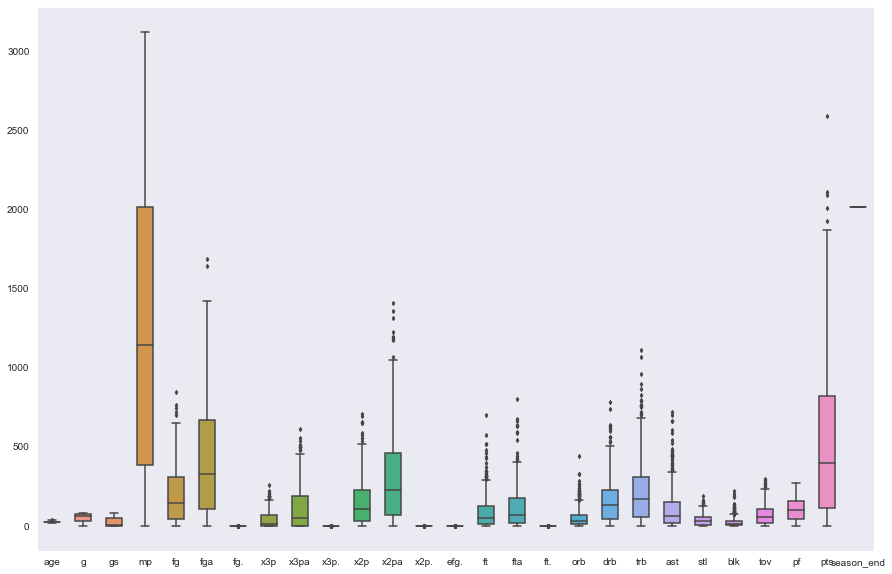

In [9]:
#checking for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [10]:
#taking 99% of data for training
data_cleaned = data
# for column in data_cleaned.drop(['season_end'], axis=1):
#     if data_cleaned[column].dtype != object:
#         q = data_cleaned[column].quantile(0.99)
#         data_cleaned = data_cleaned[data_cleaned[column]<q]

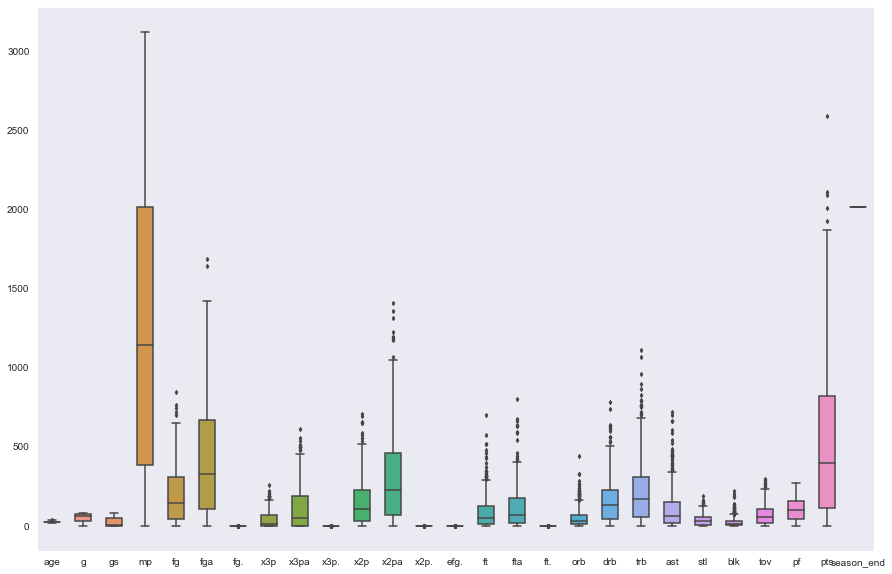

In [11]:
#checking for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [12]:
#checking null values
data_cleaned.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [13]:
#checking skewnes of data
for column in data_cleaned.drop(['season_end'], axis=1).columns:
    if data_cleaned[column].dtype != object:
        print("{} = {}".format(column, data_cleaned[column].skew()))

age = 0.6654038420733254
g = -0.6253391673187659
gs = 0.8000092890081096
mp = 0.25039553810415427
fg = 0.9210521753826488
fga = 0.854159201234759
fg. = -0.5994689578330709
x3p = 1.4711846331736562
x3pa = 1.2741377736392487
x3p. = 0.08188028814842231
x2p = 1.1600796079073834
x2pa = 1.1037666241714281
x2p. = -1.1206428076388129
efg. = -1.4165047146237078
ft = 1.9157226470848825
fta = 1.7413096483106452
ft. = -1.7724776264727307
orb = 1.9942768447957937
drb = 1.2581849862721626
trb = 1.3771284024230235
ast = 1.845963799206983
stl = 1.0894613729478917
blk = 2.6239526183919204
tov = 1.063528681097044
pf = 0.19882702139652414
pts = 1.0462461372844891


In [14]:
#taking the necessary data for training
data_transformed = data_cleaned.drop(['player', 'pos', 'bref_team_id', 'fg.', 'x3p.', 'x2p.', 'efg.', 'ft.', 'orb', 'drb',
                                      'season', 'season_end'], axis=1)

In [15]:
#creating dummy data for pos feature
dummy_pos = pd.get_dummies(data_cleaned['pos'], drop_first=True)

In [16]:
final_data = pd.concat([data_transformed.drop(['pts'], axis=1), dummy_pos], axis=1)

In [17]:
#checking the final data
final_data

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,...,stl,blk,tov,pf,F,G,PF,PG,SF,SG
0,23,63,0,847,66,141,4,15,62,126,...,23,26,30,122,0,0,0,0,1,0
1,20,81,20,1197,93,185,0,0,93,185,...,40,57,71,203,0,0,0,0,0,0
2,27,53,12,961,143,275,0,0,143,275,...,24,36,39,108,0,0,1,0,0,0
3,28,73,73,2552,464,1011,128,300,336,711,...,35,3,146,136,0,0,0,0,0,1
4,25,56,30,951,136,249,0,1,136,248,...,23,46,63,187,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,72,16,1765,345,808,40,188,305,620,...,78,16,204,151,0,0,0,0,0,1
477,28,64,9,1810,387,889,135,350,252,539,...,46,12,95,156,0,0,0,0,0,1
478,25,79,78,2718,582,1283,90,292,492,991,...,167,36,165,213,0,0,1,0,0,0
479,21,82,3,1416,172,404,0,1,172,403,...,40,41,87,170,0,0,0,0,0,0


In [18]:
#adjusted R-square
def adj_r2(x, y, model):
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adj_r2_score = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2_score

In [19]:
#diving data into features and target
sc = StandardScaler()
X_scaled = sc.fit_transform(final_data)
y = data_transformed['pts']
y.shape

(481,)

In [20]:
#splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.3, random_state=42)

In [21]:
#creating an instance of KNNRegessor and fitting the trained data
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [22]:
pickle.dump(knn, open('final_knn_model_v1.pkl', 'wb'))

In [23]:
#checking the scores
print('train score = ', knn.score(x_train, y_train))
print('test score = ', knn.score(x_test, y_test))
print('adjusted R2 score = ', adj_r2(x_test, y_test, knn))

train score =  0.9665371213867836
test score =  0.962300301473822
adjusted R2 score =  0.9547603617685864


Text(0.5, 1.0, 'Actual vs Predicted Points')

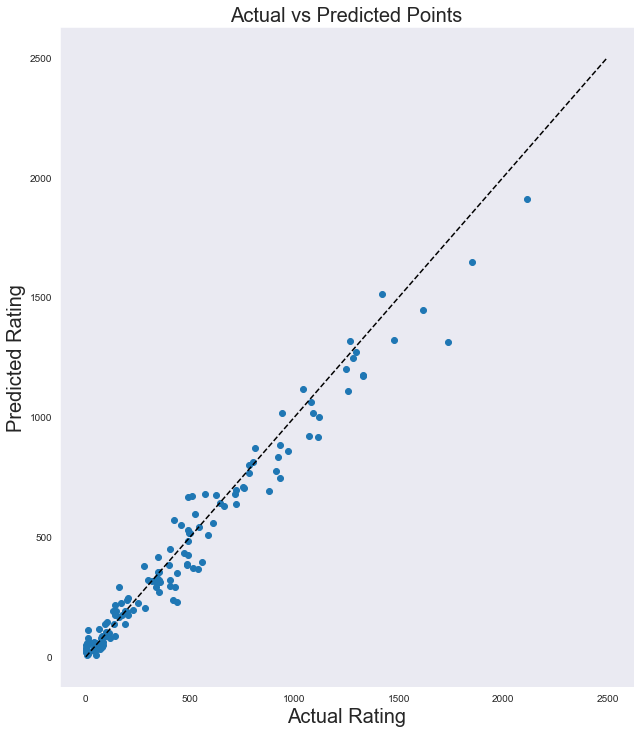

In [24]:
#visualizing actual vs predicted points
plt.figure(figsize=(9,10))
plt.scatter(y_test, knn.predict(x_test))
plt.plot([0,2500], [0,2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating', fontsize=20)
plt.ylabel('Predicted Rating', fontsize=20)
plt.tight_layout()
plt.title('Actual vs Predicted Points', fontsize=20)

## Hyperparameter Tuning

In [25]:
#initializing the parameters
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : np.arange(20,40,step=2),
               'weights' : ['uniform', 'distance'],
               'n_neighbors' : np.arange(2,20,step=2)
              }

In [26]:
#finding the best parameter with gridsearchcv
gridsearch = GridSearchCV(knn, param_grid,verbose=3, n_jobs=-1)
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   57.5s finished


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38]),
                         'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [27]:
#fitting the model with best parameter
knn = KNeighborsRegressor(**gridsearch.best_params_)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, n_neighbors=4,
                    weights='distance')

In [28]:
pickle.dump(knn, open('final_knn_model_v2.pkl', 'wb'))

In [29]:
#checking the scores
print('train score = ', knn.score(x_train, y_train))
print('test score = ', knn.score(x_test, y_test))
print('adjusted R2 score = ', adj_r2(x_test, y_test, knn))

train score =  1.0
test score =  0.9661376022357846
adjusted R2 score =  0.9593651226829415


Text(0.5, 1.0, 'Actual vs Predicted Points')

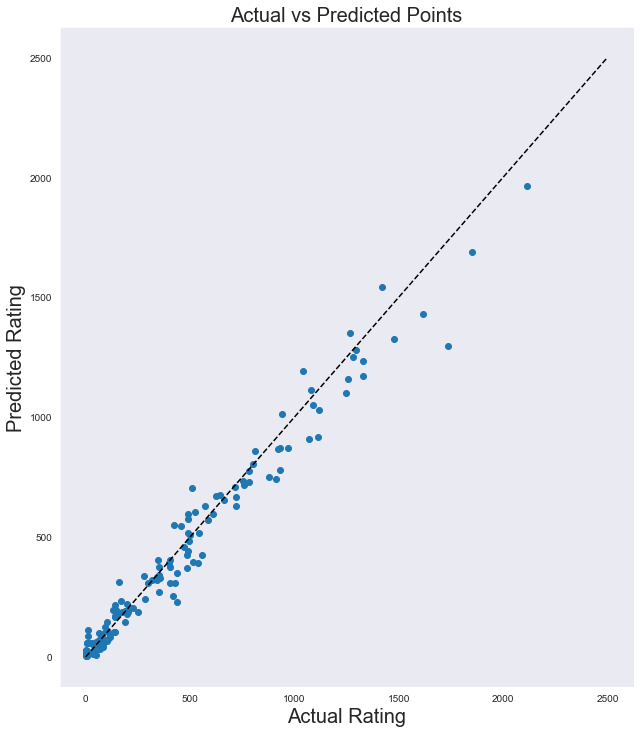

In [30]:
#visualizing actual vs predicted points
plt.figure(figsize=(9,10))
plt.scatter(y_test, knn.predict(x_test))
plt.plot([0,2500], [0,2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating', fontsize=20)
plt.ylabel('Predicted Rating', fontsize=20)
plt.tight_layout()
plt.title('Actual vs Predicted Points', fontsize=20)

In [31]:
#using KFold
kfold = KFold(n_splits=10,random_state= 442)
kfold.get_n_splits(X_scaled)

C:\Users\ARKAJIT\Anaconda3\envs\practice\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10

In [32]:
#using KFold to check the performance of the model
from statistics import mean
knn = KNeighborsRegressor(**gridsearch.best_params_)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 
    knn.fit(X_train,y_train)
    train_score_ = adj_r2(X_train,y_train, knn)
    test_score_ =  adj_r2(X_test,y_test, knn)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   1.0 and test score is :   0.9132208503759005
for k =  2
train_score is :   1.0 and test score is :   0.9213407451865245
for k =  3
train_score is :   1.0 and test score is :   0.8867649849795455
for k =  4
train_score is :   1.0 and test score is :   0.8873282368409838
for k =  5
train_score is :   1.0 and test score is :   0.9473996171574721
for k =  6
train_score is :   1.0 and test score is :   0.9484942833763788
for k =  7
train_score is :   1.0 and test score is :   0.919202947902241
for k =  8
train_score is :   1.0 and test score is :   0.8568205584274073
for k =  9
train_score is :   1.0 and test score is :   0.9245782821831213
for k =  10
train_score is :   1.0 and test score is :   0.9573761781918825
************************************************
************************************************
Average train score is :   1.0
Average test score is :   0.9162526684621457


([<matplotlib.axis.YTick at 0x22b1f717c88>,
 <a list of 7 Text major ticklabel objects>)

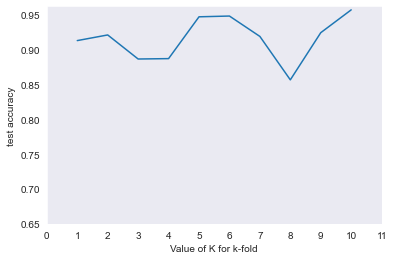

In [33]:
plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 

we can see our model is giving a train score of almost 99% and test score of 91%

In [34]:
pickle.dump(knn, open('final_knn_model_v3.pkl', 'wb'))
pickle.dump(sc, open('final_knn_scale.pkl', 'wb'))